In [197]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix

## 9.6.1 Support Vector Classifier

In [208]:
# Generate som sample data with 2 predictors and a response
np.random.seed(2)
X = np.random.normal(0, 1, (20, 2))
y = np.concatenate((np.repeat(0, 10), np.repeat(1, 10)))
X[y==1, :] = X[y==1, :] +1



,x1,x2,y
0,-0.416758,-0.056267,0
1,-2.136196,1.640271,0
2,-1.793436,-0.841747,0
3,0.502881,-1.245288,0
4,-1.057952,-0.909008,0
5,0.551454,2.292208,0
6,0.041539,-1.117925,0
7,0.539058,-0.596160,0
8,-0.019130,1.175001,0
9,-0.747871,0.009025,0


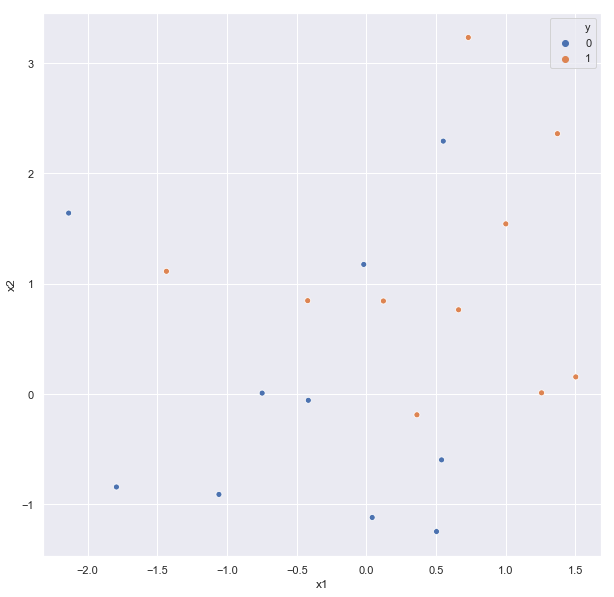

In [209]:
# Plot it, is it linearly seperable?
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
display(df)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);


In [210]:
model = svm.SVC(kernel='linear', C=10, random_state=0).fit(X, y)

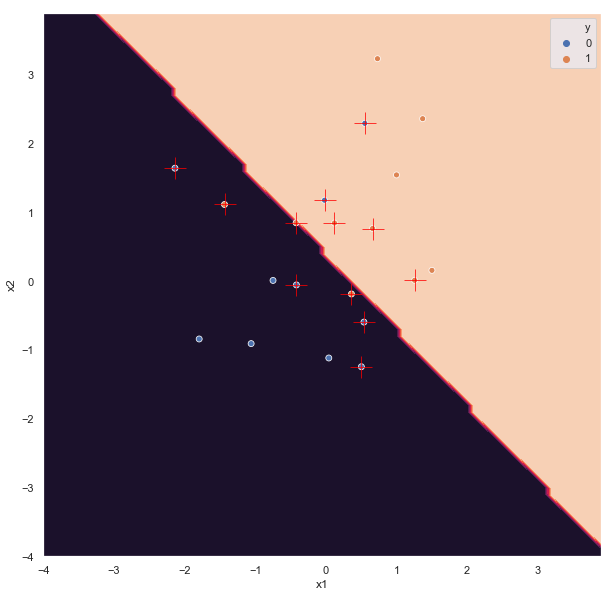

In [211]:
# Decistion boundary plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

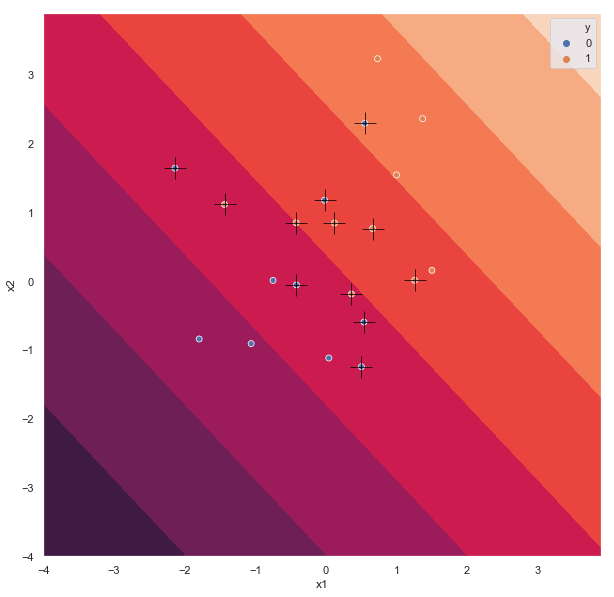

In [212]:
# Contour plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.decision_function(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df);
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='black', marker='+', s=500)


### We can obtain some basic information about the support vector classifier

In [213]:
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)



Model parameters:
<bound method BaseEstimator.get_params of SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[6 6]

Coefficients of the support vector in the decision function. :
[[-10.          -5.05497878  -7.40089843 -10.         -10.
  -10.          10.          10.           2.45587721  10.
   10.          10.        ]]

Weights assigned to the features (coefficients in the primal problem).
[[1.00241093 0.91678573]]


### What if we instead use a smaller value of the cost parameter?


Model parameters:
<bound method BaseEstimator.get_params of SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[8 8]

Coefficients of the support vector in the decision function. :
[[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1
   0.1  0.1]]

Weights assigned to the features (coefficients in the primal problem).
[[0.473289   0.29874954]]


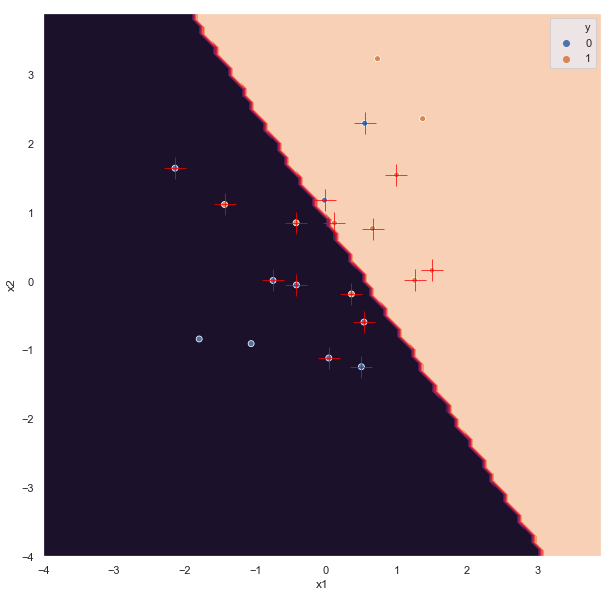

In [214]:
model = svm.SVC(kernel='linear', C=0.1, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-4, 4, .1)
x2 = np.arange(-4, 4, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)


With lower cost parameter the model uses more support vectors because the margin is now wider

### Use cross-validation to tune Cost parameter

In [215]:
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 100]
scores = []
for C in Cs:
    model = svm.SVC(kernel='linear', C=C, random_state=0)
    score = cross_val_score(model, X, y, cv=5)
    scores += [score]
    
scores_mean = np.mean(np.asarray(scores), axis=1)

pd.DataFrame({'C': Cs, 'accuracy': scores_mean})

,C,accuracy
0,0.001,0.60
1,0.010,0.60
2,0.100,0.60
3,1.000,0.70
4,5.000,0.75
5,10.000,0.75
6,100.000,0.75


Text(0.5,0,'log(C)')

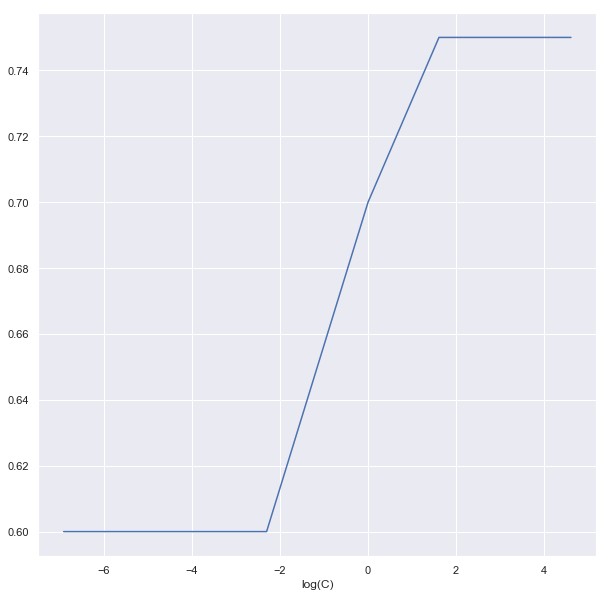

In [216]:
plt.figure(figsize=(10,10))
sns.lineplot(x=np.log(Cs), y=scores_mean)
plt.xlabel('log(C)')
# plt.ylabel('accuracy');

In [217]:
# Generate simulated test set
xtest = np.random.normal(0, 1, (20, 2))
ytest = np.random.choice([0, 1], size=20, replace=True)
xtest[ytest==1, :] = xtest[ytest==1, :] +1

In [218]:
# With cost = 5
# Test model selected by cross-validation
model = svm.SVC(kernel='linear', C=5, random_state=0).fit(X, y)
ypred = model.predict(xtest)

confusion_matrix(ytest, ypred)

array([[ 6,  4],
       [ 0, 10]])

In [219]:
# With cost = 0.01
# Test model selected by cross-validation
model = svm.SVC(kernel='linear', C=0.01, random_state=0).fit(X, y)
ypred = model.predict(xtest)

confusion_matrix(ytest, ypred)

array([[7, 3],
       [2, 8]])

### Now consider a situation in which two classes are linearly seperable

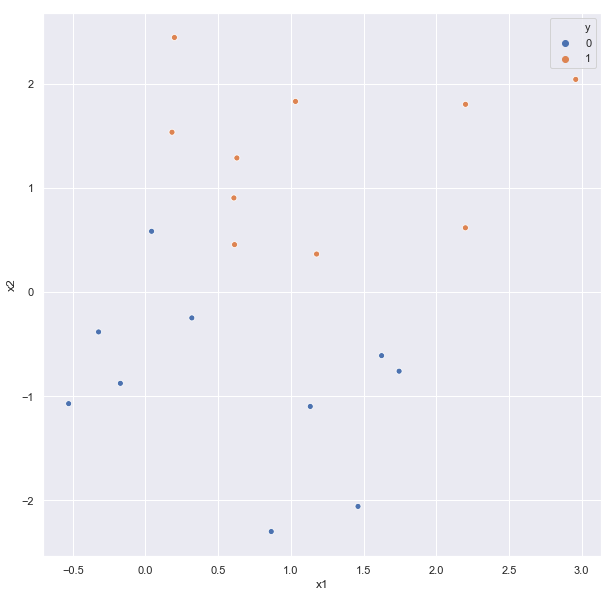

In [231]:
# Generate set that is linearly seperable
np.random.seed(1)
X = np.random.normal(0, 1, (20, 2))
y = np.concatenate((np.repeat(0, 10), np.repeat(1, 10)))
X[y==1, :] = X[y==1, :] + 1.3

df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[2 1]

Coefficients of the support vector in the decision function. :
[[ -9.19595849 -25.03717651  34.233135  ]]

Weights assigned to the features (coefficients in the primal problem).
[[4.98467412 6.60267588]]


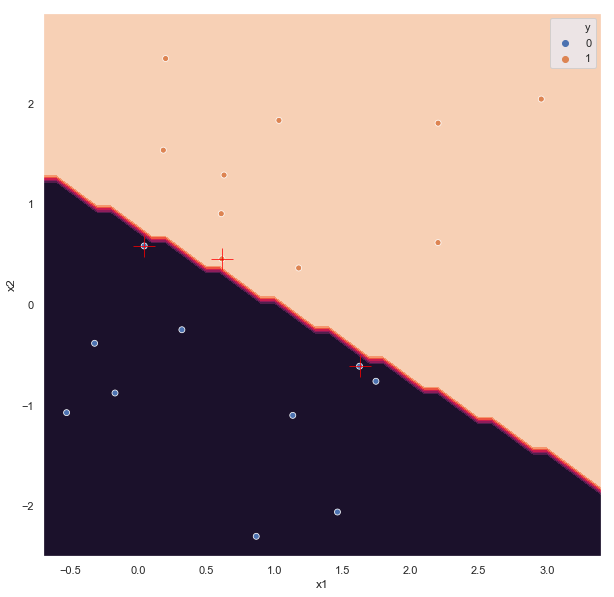

In [239]:
model = svm.SVC(kernel='linear', C=1e5, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-.7, 3.5, .1)
x2 = np.arange(-2.5, 3, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)

No training errors, only three support vectors used. We can see that margin is very narrorw because the support vectors are very close to the the decision boundary. 

### Now with a smaller value of cost

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[3 3]

Coefficients of the support vector in the decision function. :
[[-0.90534066 -0.79575232 -1.          1.          0.70109298  1.        ]]

Weights assigned to the features (coefficients in the primal problem).
[[0.4497637  1.62175449]]


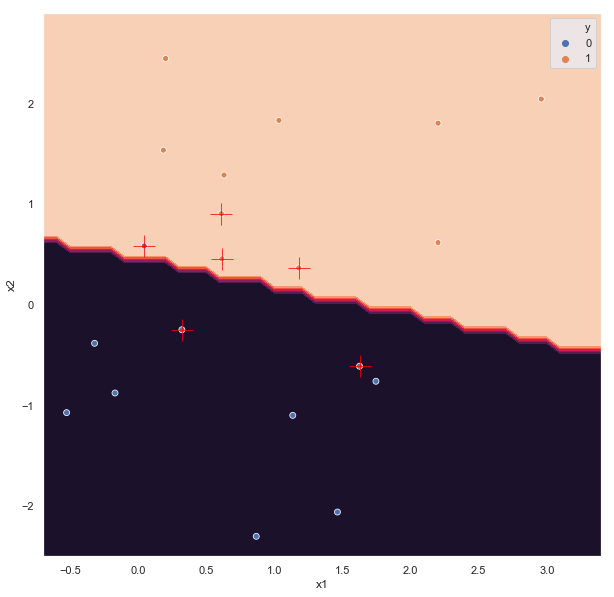

In [241]:
model = svm.SVC(kernel='linear', C=1, random_state=0).fit(X, y)

# Decistion boundary plot

x1 = np.arange(-.7, 3.5, .1)
x2 = np.arange(-2.5, 3, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df)
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500);

print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nWeights assigned to the features (coefficients in the primal problem).')
print(model.coef_)

Using cost 1 we misclassify a training observation but there is a wider margin and so are more support vectors. It seems likely this model will be less affected by overfitting than when cost=1e5.

## 9.6.2 Support Vector Machine

In [245]:
# Geenrate data with a non-linear class boundary
np.random.seed(1)
X = np.random.normal(0, 1, (200, 2))
X[1:100,]   = X[1:100,] + 2
X[101:150,] = X[101:150,] - 2
y = np.concatenate((np.repeat(0, 150), np.repeat(1, 50)))

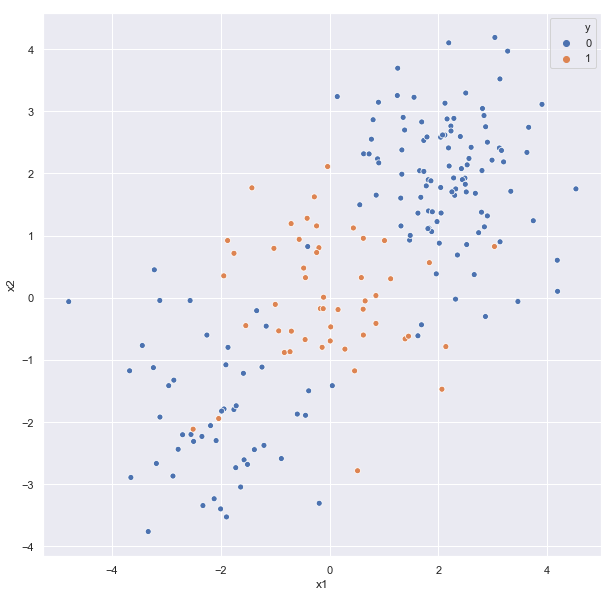

In [247]:
# Plot data
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

In [255]:
# Index a training set
train = np.random.random(len(y)) > 0.5

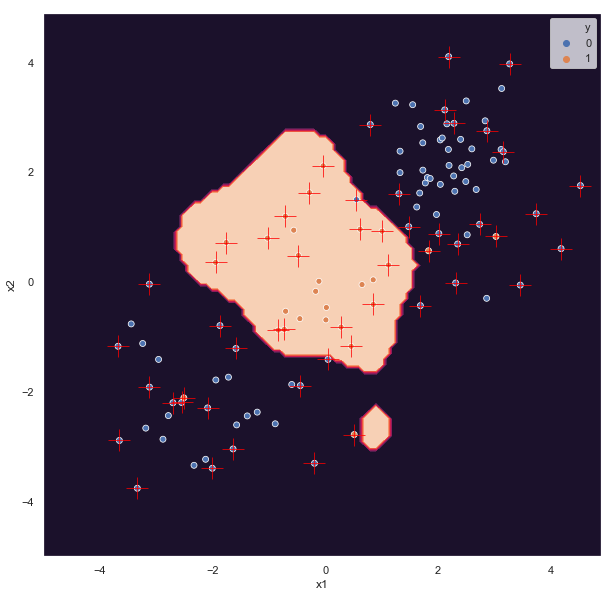

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[34 19]

Coefficients of the support vector in the decision function. :
[[-0.37132271 -0.48342346 -0.33497995 -0.29851476 -0.0850208  -0.17263003
  -1.         -0.17777894 -0.01244395 -0.6090602  -0.16824076 -0.31539116
  -0.57799269 -0.08416399 -1.         -0.74614472 -1.         -0.25458311
  -0.179926   -0.29396624 -0.210785   -0.56730368 -0.71857197 -0.97968356
  -0.06553295 -0.2440551  -0.29817169 -0.79069468 -0.02047509 -1.
  -0.693316   -0.12147924 -0.00789739 -0.77974867  1.          0.57788719
   0.73784018  1.          1.          0.32380479  1.          0.38521508
   1.          1.          1.          1.          1.          0.74624735
   1.          0.5799908

In [279]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0).fit(X[train], y[train])

# Decision boundary plot

x1 = np.arange(-5, 5, .1)
x2 = np.arange(-5, 5, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df[train])
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
plt.show();

# Get summary of model
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nTraining accuracy:')
print(model.score(X[train], y[train]))

We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of cost, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

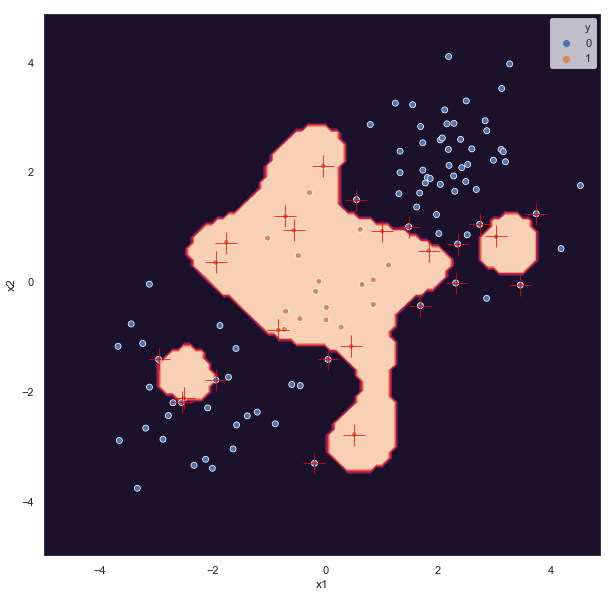

Model parameters:
<bound method BaseEstimator.get_params of SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

Number of support vectors for each class.:
[13 12]

Coefficients of the support vector in the decision function. :
[[-2.94408546e+00 -1.28564417e+00 -3.46014897e+00 -1.10607541e+00
  -4.38574425e+00 -1.07806443e+01 -2.95485465e+00 -1.25758441e+01
  -2.56721287e+02 -4.33636718e-01 -7.63309008e+00 -3.08082873e+01
  -1.50760502e+01  6.67359160e+00  1.30223908e+01  8.84018653e-01
   2.84972061e+02  7.89188937e+00  8.98519034e+00  9.71729935e-01
   2.50255629e+00  3.47333278e+00  1.68532851e+01  1.78243944e-01
   3.75710246e+00]]

Training accuracy:
1.0


In [278]:
model = svm.SVC(kernel='rbf', gamma=1, C=1e5, random_state=0).fit(X[train], y[train])

# Decision boundary plot

x1 = np.arange(-5, 5, .1)
x2 = np.arange(-5, 5, .1)


xx1, xx2 = np.meshgrid(x1, x2, sparse=False)

Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
y_hat = model.predict(Xgrid)
y_grid = y_hat.reshape(len(x2), len(x1))
y_grid.shape

fig = plt.figure(figsize=(10, 10))
plt.contourf(x1, x2, y_grid);
sns.scatterplot(x='x1', y='x2', hue='y', data=df[train])
sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
plt.show();

# Get summary of model
print('Model parameters:')
print(model.get_params)

print('\nNumber of support vectors for each class.:')
print(model.n_support_)

print('\nCoefficients of the support vector in the decision function. :')
print(model.dual_coef_)

print('\nTraining accuracy:')
print(model.score(X[train], y[train]))